# Spanish Electricity Market Analysis: Part 1/2

## Part 2: Statistics and Data Visualization

In [77]:
import pandas as pd
import seaborn as sns
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import numpy as np
import datetime as dt

sns.set()

In [14]:
plt.style.use('ggplot')

### Daily electricity generation. Visualization

In [31]:
os.getcwd()
PBF_total_df = pd.read_csv('cleaned_data/PBF_total_df.csv', index_col=0) #reading the csv file with the aggregated data from 2014-2018. 

In [32]:
PBF_total_df.head()

,value
date,
2014-01-01,642771.8
2014-01-02,658078.5
2014-01-03,680564.6
2014-01-04,644494.7
2014-01-05,598661.4


In [34]:
PBF_total_df.index = pd.to_datetime(PBF_total_df.index)


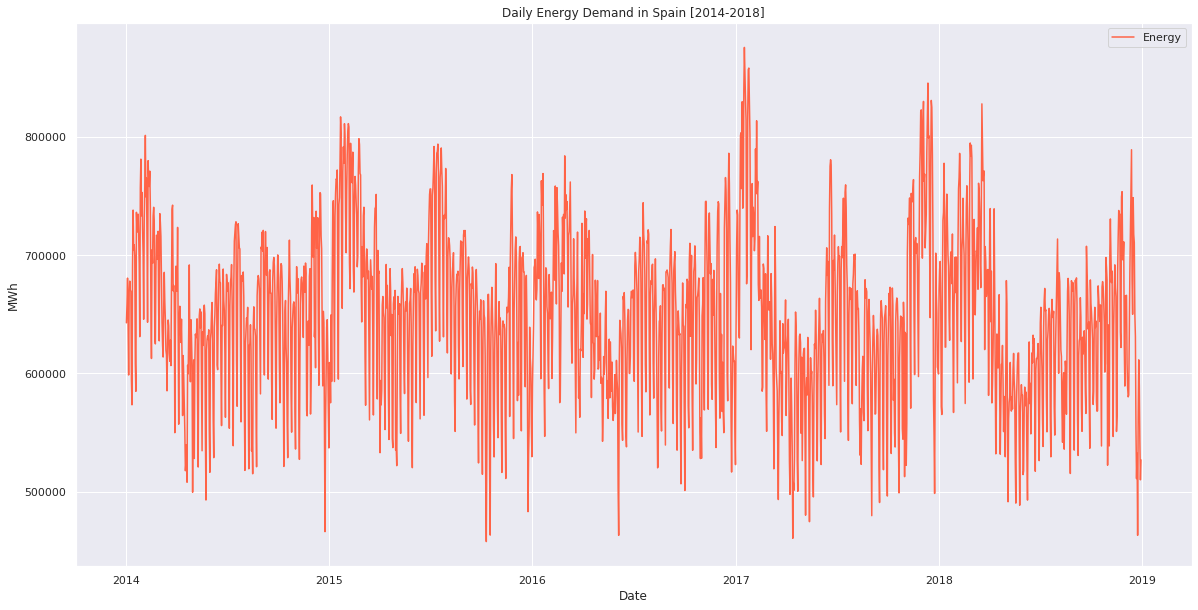

In [110]:
plt.figure(figsize=(20,10))
plt.plot(PBF_total_df.index, PBF_total_df.value, label='Energy', color='tomato' )
plt.ylabel('MWh')
plt.xlabel('Date')
plt.title('Daily Energy Demand in Spain [2014-2018]')
#plt.xlim(('2014-01-01', '2018-12-31'))
plt.legend()
plt.show()


In order to be able to perform a data analysis over time-series, we need to split our date into year, quarter, month, and weekday

In [58]:
PBF_total_df['year'] = PBF_total_df.index.year #to specify only the year. 
PBF_total_df['quarter'] = PBF_total_df.index.quarter #to see to which season it belongs
PBF_total_df['month'] = PBF_total_df.index.month
PBF_total_df['week'] = PBF_total_df.index.week
PBF_total_df['weekday'] = PBF_total_df.index.weekday

In [63]:
PBF_total_df[-10:]

,value,year,quarter,month,week,weekday
date,,,,,,
2018-12-21,553252.4,2018,4,12,51,4
2018-12-22,511090.4,2018,4,12,51,5
2018-12-23,532506.3,2018,4,12,51,6
2018-12-24,463137.8,2018,4,12,52,0
2018-12-25,562606.4,2018,4,12,52,1
2018-12-26,611465.3,2018,4,12,52,2
2018-12-27,589771.5,2018,4,12,52,3
2018-12-28,543353.5,2018,4,12,52,4
2018-12-29,510049.1,2018,4,12,52,5


### Annual Boxplot distribution. Is Electricity consumption increasing? 


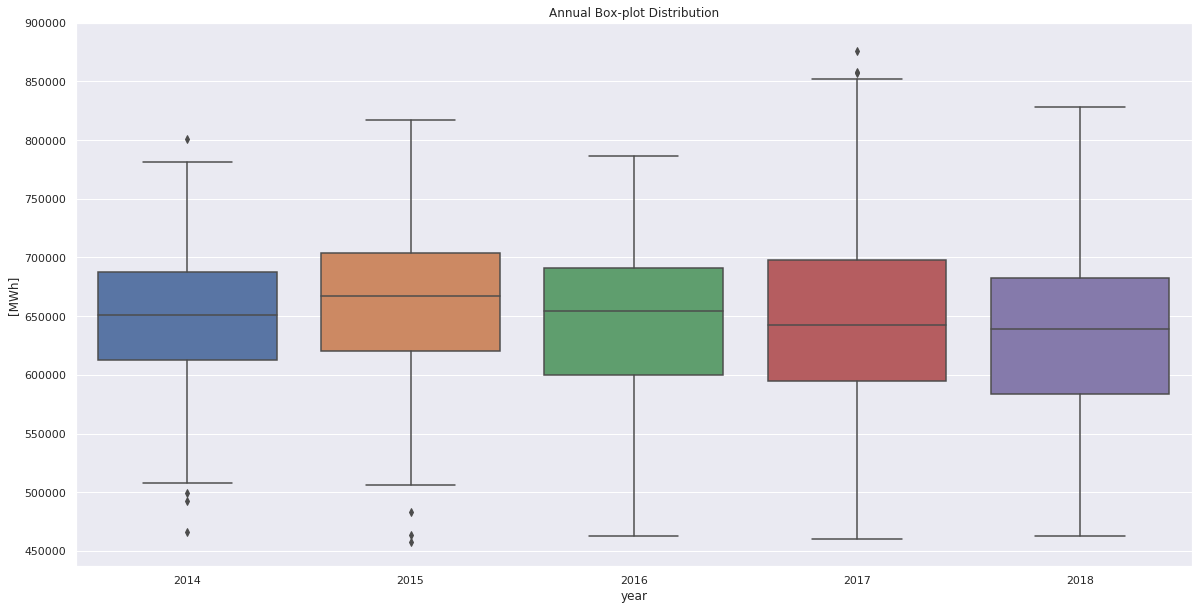

In [108]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df["2014":"2018"], x="year", y="value")
plt.title("Annual Box-plot Distribution")
plt.ylabel('[MWh]')
plt.yticks(np.arange(450000,950000,50000))
plt.show()


**hypotheses testing (si hay tiempo)**

### Seasonality trend. Does electricity consumption vary depending on the season? 

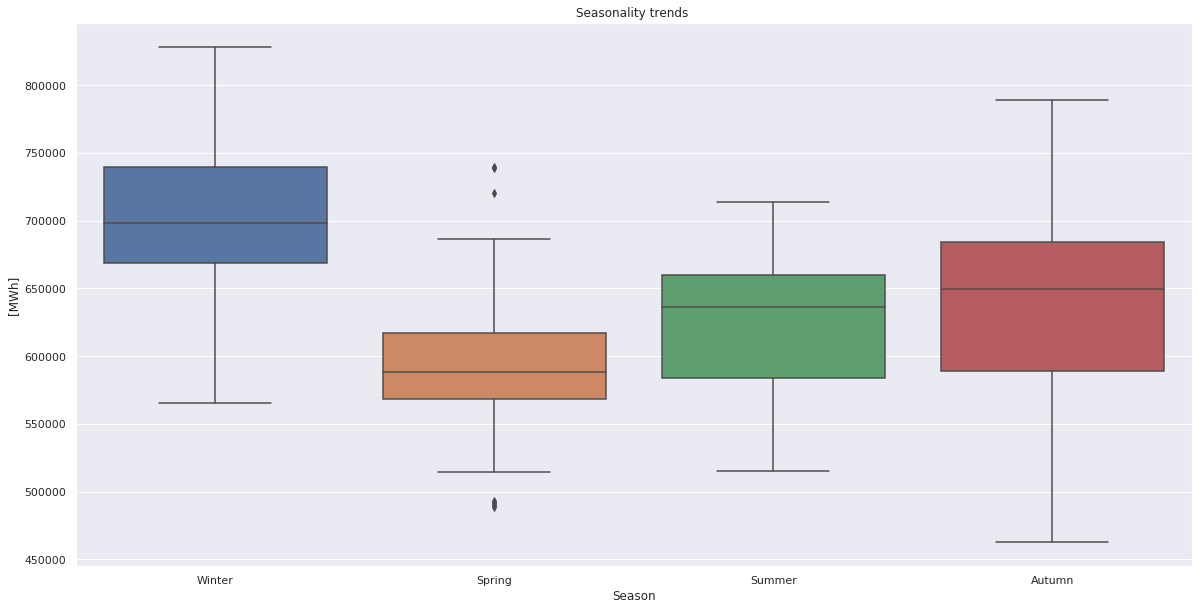

In [104]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df['2018'], x="quarter", y="value")
plt.title("Seasonality trends ")
plt.ylabel('[MWh]')
plt.xlabel('Season')
plt.xticks(np.arange(0,4), ('Winter', 'Spring', 'Summer', 'Autumn'))
plt.show()

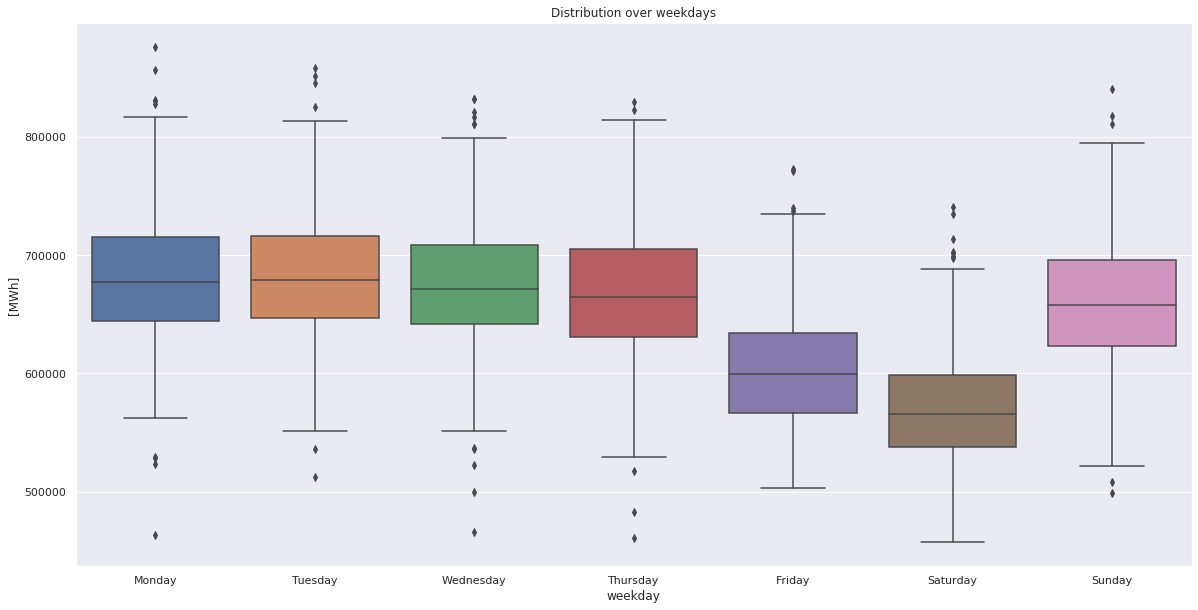

In [94]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df, x="weekday", y="value")
plt.title("Distribution over weekdays")
plt.xticks(np.arange(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

plt.ylabel("[MWh]")
plt.show()


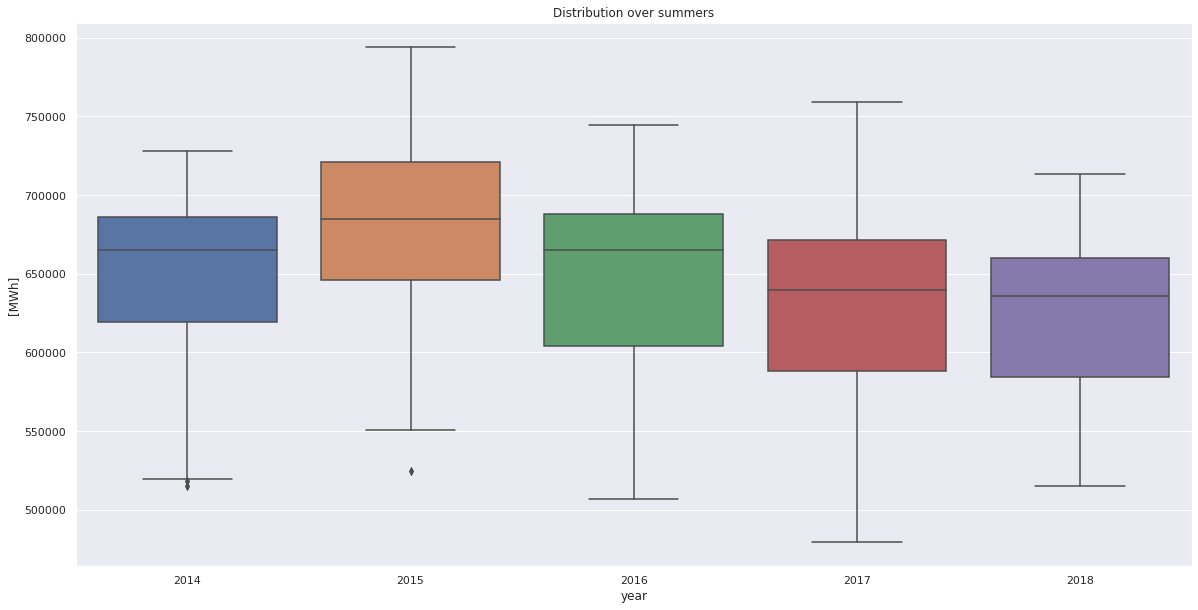

In [112]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df[PBF_total_df['quarter']==3], x="year", y="value")
plt.title("Distribution over summers")


plt.ylabel("[MWh]")
plt.show()

https://earthobservatory.nasa.gov/images/87359/2015-was-the-hottest-year-on-record

### Daily electricity generation per source. Visualization

In [141]:
os.getcwd()

'/home/ingrid/Documents/DA_Ironhack/Week5/Project-Week-5-Your-Own-Project/your-project'

In [151]:
gen_source_df = pd.read_csv('cleaned_data/generation_per_source.csv') #reading the csv file with the aggregated data from 2014-2018. 

In [152]:
gen_source_df['date'] = pd.to_datetime(gen_source_df['date'])

In [153]:
gen_source_df.dtypes #we check it is a datetime object 

date         datetime64[ns]
source               object
value_MWh           float64
dtype: object

In [154]:
gen_source_df['year'] = gen_source_df['date'].dt.year

In [155]:
gen_source_df.head()

,date,source,value_MWh,year
0,2014-01-01,CHP,4497.5,2014
1,2014-01-01,coal,2498.7,2014
2,2014-01-01,hydro_1,87564.8,2014
3,2014-01-01,hydro_2,15226.2,2014
4,2014-01-01,natural_gas,75993.1,2014


In this case, we are not considering the two types of hydro, since in this project they can be both considered as hydro renewable sources. For this reason, we will aggregate them. 


In [161]:
names = {'hydro_1':'hydro', 'hydro_2':'hydro'}
gen_source_df['source'].replace(names,inplace=True)
gen_source_df = gen_source_df.groupby(['date', 'source','year'], as_index=False).agg('sum')

In [164]:
gen_source_df.head()

,date,source,year,value_MWh
0,2014-01-01,CHP,2014,4497.5
1,2014-01-01,coal,2014,2498.7
2,2014-01-01,hydro,2014,102791.0
3,2014-01-01,natural_gas,2014,75993.1
4,2014-01-01,nuclear,2014,144654.6


### Adding new columns to have renewable and non-renewable sources

In [247]:
gen_source_df.source.unique()

array(['CHP', 'coal', 'hydro', 'natural_gas', 'nuclear', 'solar_PV',
       'wind_power'], dtype=object)

In [ ]:
RES_lst = ['hydro', '']

In [ ]:
gen_source_df['RES_CES'] = 

### Grouping by year and source to plot a pie chart

In [186]:
agg_gen = gen_source_df.groupby(by=['year', 'source']).sum()

In [237]:
agg_gen.head()

value_MWh
year source                 
2014 CHP           8472464.0
     coal         33498013.7
     hydro        42868314.2
     natural_gas  23128476.2
     nuclear      55239602.4

0
1
2
3


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


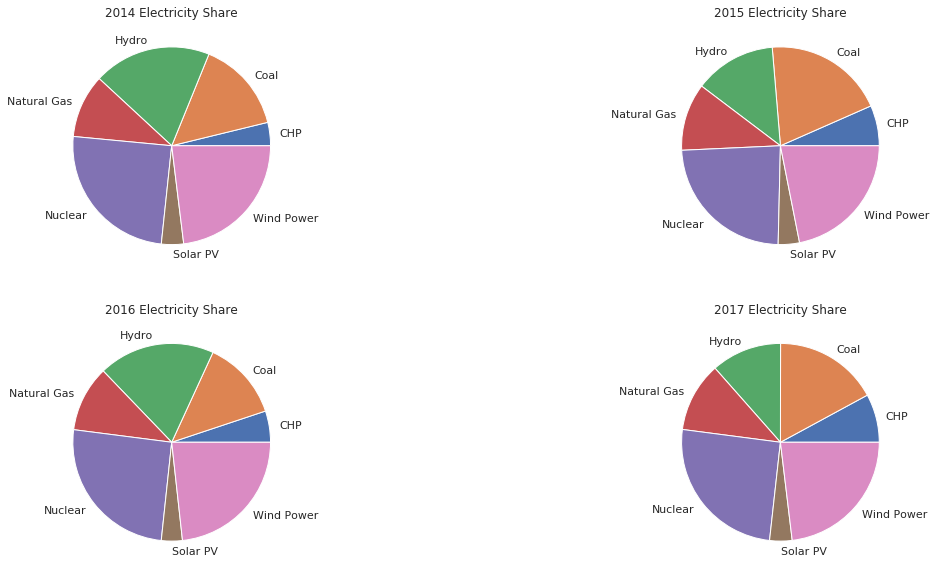

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app


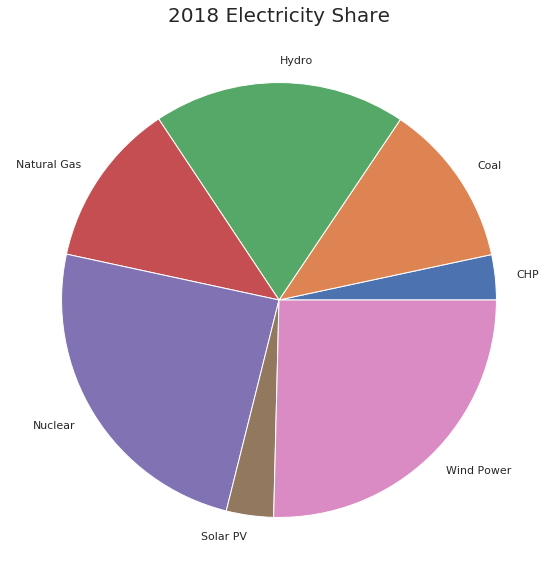

In [245]:
years=[2014,2015,2016,2017]
labels=['CHP', 'Coal', 'Hydro', 'Natural Gas', 'Nuclear', 'Solar PV', 'Wind Power']

fig,axs = plt.subplots(2,2, figsize=(20,10))
axs = axs.ravel()

for i in range(len(years)):
    axs[i].pie(agg_gen.loc[years[i],:], labels=labels)
    axs[i].set_title(str(years[i]) + ' Electricity Share')

plt.show()

plt.figure(figsize=(20,10))
plt.pie(agg_gen.loc[2018,:], labels=labels)
plt.title('2018 Electricity Share', fontsize=20)

plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


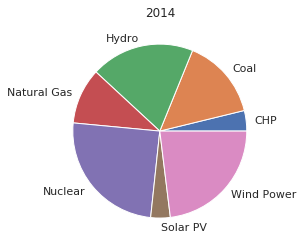

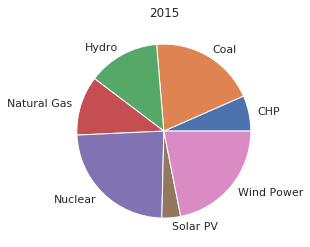

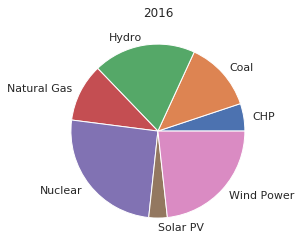

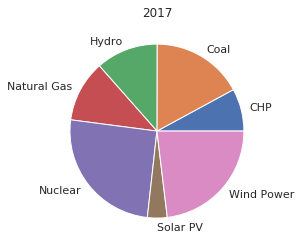

In [222]:
#prova per fer els piecharts

for year in years:
    plt.pie(agg_gen.loc[year,:], labels=labels)
    plt.title(year)
    plt.show()

### Pie chart: evolution of Energy Resources for Electricity generation in Spain (yearly total electricity produced)

## Multi-indexing pd DataFrame

In [12]:
#we create a multi index pd dataframe in order to facilitate the data visualization later
gen_source_df.set_index(['date', 'source'], inplace=True)
gen_source_df.sort_index(inplace=True)

In [114]:
gen_source_df.head()

value_MWh
date       source                
2014-01-01 CHP             4497.5
           coal            2498.7
           hydro_1        87564.8
           hydro_2        15226.2
           natural_gas    75993.1

In [115]:
gen_source_df.groupby('source').mean()

,value_MWh
source,
CHP,33292.798885
coal,94283.964399
hydro_1,90268.082530
hydro_2,9383.232566
natural_gas,68037.737185
nuclear,150840.289863
solar_PV,21561.278368
wind_power,142036.368110
